In [1]:
import os
import pandas as pd
import numpy as np

In [4]:
protein_clusters_file ="PCs_GPD.txt"
protein_clusters = dict()
with open(protein_clusters_file) as myfile:
    for line in myfile.readlines():
        line = line.strip()
        rep = line.split("\t")[0]
        for phID in line.split("\t"):
            protein_clusters[phID] = rep
            
protein_seq_file = "GPD_proteome.faa"
phage_meta_df = pd.read_table("GPD_phage_metadata_renat.csv", sep = ",", index_col = 0)

# Count Phages and Proteins

In [9]:
my_phages = set()
for index, row in phage_meta_df.iterrows():
    my_phages.add(index)

print("All Phages in GPD", len(my_phages))

All Phages in GPD 142810


In [10]:
my_protein_clusters = dict()
mark_for_write = False
count_X = 0
count_proteins = 0
with open(protein_seq_file) as seq_file:
    for line in seq_file:
        if line.startswith(">"):
            identifier = line.strip()[1:]
            phageID = "_".join(identifier.split("_")[0:2])
            if phageID in my_phages:
                mark_for_write = True
            else:
                mark_for_write = False
        else:
            if mark_for_write:
                if "X" not in line:
                    count_proteins += 1
                    if identifier in protein_clusters:
                        cluster_name = protein_clusters[identifier]
                    else:
                        cluster_name = identifier
                    if cluster_name not in my_protein_clusters:
                        my_protein_clusters[cluster_name] = []
                    my_protein_clusters[cluster_name].append({"proteinID":identifier,"seq":line, "size":len(line)})
                    
                else:
                    count_X = count_X +1
                
print(count_proteins, "proteins found in", len(my_protein_clusters), "clusters, and additional",count_X,"proteins countain an X")

7581279 proteins found in 309842 clusters, and additional 528 proteins countain an X


# Select Phages

In [10]:
phage_meta_df.shape

(142814, 16)

In [11]:
def isNaN(num):
    return num != num

my_phages = set()
for index, row in phage_meta_df.iterrows():
    if row["checkV_MIUViG"] == "High-quality":
        if not isNaN(row["Continents_detected"]):
            my_phages.add(index)

print("HQ (checkV_MIUViG = 'High-quality') Phages with at least 1 detected Sample", len(my_phages))

HQ (checkV_MIUViG = 'High-quality') Phages with at least 1 detected Sample 38848


In [12]:
def isNaN(num):
    return num != num

my_phages = set()
for index, row in phage_meta_df.iterrows():
    if row["checkV_MIUViG"] == "High-quality":
        my_phages.add(index)

print("HQ (checkV_MIUViG = 'High-quality') Phages:", len(my_phages))

HQ (checkV_MIUViG = 'High-quality') Phages: 41427


In [23]:
def isNaN(num):
    return num != num

my_phages = set()
for index, row in phage_meta_df.iterrows():
    if row["checkV_MIUViG"] == "High-quality":
        if not isNaN(row["Continents_detected"]):
            countrylist = row["Continents_detected"].split(",") 
            if 'North America' in countrylist :
                if countrylist.count("North America") > 0 :
                    my_phages.add(index)

print("HQ (checkV_MIUViG = 'High-quality') Phages with at least 1 North American Sample", len(my_phages))

HQ (checkV_MIUViG = 'High-quality') Phages with at least 1 North American Sample 7614


In [24]:
my_protein_clusters = dict()
mark_for_write = False
count_X = 0
count_proteins = 0
with open(protein_seq_file) as seq_file:
    for line in seq_file:
        if line.startswith(">"):
            identifier = line.strip()[1:]
            phageID = "_".join(identifier.split("_")[0:2])
            if phageID in my_phages:
                mark_for_write = True
            else:
                mark_for_write = False
        else:
            if mark_for_write:
                if "X" not in line:
                    count_proteins += 1
                    if identifier in protein_clusters:
                        cluster_name = protein_clusters[identifier]
                    else:
                        cluster_name = identifier
                    if cluster_name not in my_protein_clusters:
                        my_protein_clusters[cluster_name] = []
                    my_protein_clusters[cluster_name].append({"proteinID":identifier,"seq":line, "size":len(line)})
                    
                else:
                    count_X = count_X +1
                
print(count_proteins, "proteins found in", len(my_protein_clusters), "clusters, and additional",count_X,"proteins countain an X")

588783 proteins found in 84306 clusters, and additional 47 proteins countain an X


In [25]:
print("X, Number of Clusters with X Elements(Proteins)")
pd.Series([len(cl) for cl in my_protein_clusters.values()]).value_counts()

X, Number of Clusters with X Elements(Proteins)


1      36715
2      14043
3       7813
4       4709
5       3131
       ...  
220        1
429        1
365        1
284        1
230        1
Length: 362, dtype: int64

In [26]:
write_file_name = "full_phageome2_proteinClusterReps.faa"
proteinClusterReps = dict()
with open(write_file_name,'w') as write_file:
    for cluster in my_protein_clusters.values():
        identifier = ""
        longest = 0
        for protein in cluster:
            identifier += protein["proteinID"] +"_"
            if protein["size"]>longest:
                longest = protein["size"]
                representative_seq = protein["seq"]
                repID = protein["proteinID"]
                
        proteinClusterReps[">REP_"+repID+"_ALL_"+identifier[:-1]] = representative_seq
        write_file.write(">REP_"+repID+"_ALL_"+identifier[:-1] + "\n")
        write_file.write(representative_seq)


In [27]:
proteinClusterReps

{'>REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36': 'MMAGMDNNIHYIISAYNPSLHWPERESNLIHYTVNYLKSLHIPGERITVMSEDLGVLSWAKAEELNVARVPDAPDEAILSIAAEHAGMDIMVLDTQCPVREADLLDVMASQIATEKDVIFISAYMGMKRAAIEDYPAWTSIVDGSVWGFRHDSDLKAIKKMRSIYYVYHDAFAGHFGVSLDYQYDKEVLDIAVKRGWEKSASTAPCSADYPRRVQIMVDKPKQNI\n',
 '>REP_uvig_48131_2_ALL_uvig_48131_2_uvig_209457_45_uvig_270087_38_uvig_276324_21_uvig_277381_101_uvig_32248_69_uvig_517213_25_uvig_536197_33_uvig_538556_37': 'MNTNQLYFDGSLGQFIRKANYEQVSVNPTLEVQHGMSSLILPLGAGFKGDLRFNFSHASALLVNVSPSNPFAWKIQLAPLNAGALPVWKTVASGMTSSVKPGGTADTIILPTDIFELDPAEYPVGTYWMTVEFSNTVDWTRTFPFTLQII\n',
 '>REP_uvig_517213_24_ALL_uvig_48131_3_uvig_209457_44_uvig_270087_39_uvig_276324_22_uvig_277381_100_uvig_32248_68_uvig_517213_24_uvig_536197_32_uvig_538556_38': 'MQLDLSHILQLYPVLKVLHYQTREGFHHERYDDAVEELGGIADSFIETYLGLHGRDWTVKPMSVRPVLPDTTTECILLYRNVILRDLVPYLYTIAGNEPALRKLAEDFEQEAQKIYGLLNNYSK\n',
 '>R

# Library Settings

In [28]:
tile_size_aa = 56
no_epis_per_tile = 3
five_prime_adapter = "AGGAATTCCGCTGCGT"
three_prime_adapter = "ATGGTCACAGCTGTGC"
#len(five_prime_adapter)+len(three_prime_adapter)

In [29]:
l = 0
with open("full_phageome2_proteinClusterReps.faa") as seq_file:
    for line in seq_file:
        if not line.startswith(">"):
            seq = line[:-1]
            l+=len(seq)
print("length of all proteins together:",l,"aa")

length of all proteins together: 15637136 aa


# Pepsyn tiling approach

In [30]:
def tileProtSeqWOverlap(aa_seq, tilesize, overlap = -1):
    # start tiles from both side, let "middle tile" over lap with already existing tiles
    # start second overlapping set from the middle in both directions to the side
    # ____   ___   ____ #
    #    ____   ____  #
    if overlap == -1:
        overlap = int(tilesize/2)
    tiles = []
    center = int(len(aa_seq)/2)
    seq = aa_seq[:center]
    pos = 0
    
    if len(aa_seq) >= tilesize:
        while len(seq) >= tilesize:
            tiles.append((seq[:tilesize],pos))
            seq = seq[tilesize-overlap:]
            pos = pos + tilesize - overlap
        tiles.append((aa_seq[pos:pos+tilesize],pos))
        seq = aa_seq[center:]
        pos = len(aa_seq) - tilesize
        while len(seq) >= tilesize:
            tiles.append((seq[-tilesize:],pos))
            seq = seq[:-(tilesize-overlap)]
            pos = pos-tilesize+overlap   
        last_tile = (aa_seq[pos:pos+tilesize],pos)
        if aa_seq[pos:pos+tilesize] != "" and last_tile not in tiles:
            tiles.append(last_tile)
    else:
        tiles.append((aa_seq, -1))
        
    return(tiles)

In [31]:
tilesize = tile_size_aa
overlap = int(tile_size_aa/2)

pepsyn_all_tiles = dict()

with open("full_phageome2_proteinClusterReps.faa") as rep_file:
    for line in rep_file:
        if not line.startswith(">"):
            seq = line.strip()
            tile_vec = tileProtSeqWOverlap(seq, tilesize, overlap)
            for tile, pos in tile_vec:
                if tile not in pepsyn_all_tiles:
                    pepsyn_all_tiles[tile] = []
                pepsyn_all_tiles[tile].append(str(protein)+"pos_"+str(pos))
        else:
            protein = line.strip()[1:]
                
print(len(pepsyn_all_tiles),"unique tiles")
no_pepsyn_tiles = len(pepsyn_all_tiles)

484761 unique tiles


In [32]:
pepsyn_all_tiles

{'MMAGMDNNIHYIISAYNPSLHWPERESNLIHYTVNYLKSLHIPGERITVMSEDLGV': ['REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36pos_0'],
 'LIHYTVNYLKSLHIPGERITVMSEDLGVLSWAKAEELNVARVPDAPDEAILSIAAE': ['REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36pos_28'],
 'LSWAKAEELNVARVPDAPDEAILSIAAEHAGMDIMVLDTQCPVREADLLDVMASQI': ['REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36pos_56'],
 'HAGMDIMVLDTQCPVREADLLDVMASQIATEKDVIFISAYMGMKRAAIEDYPAWTS': ['REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36pos_84'],
 'DAFAGHFGVSLDYQYDKEVLDIAVKRGWEKSASTAPCSADYPRRVQIMVDKPKQNI': ['REP_uvig_48131_1_ALL_uvig_48131_1_

In [33]:
print("Number duplicated tiles")
pd.Series([len(ar) for ar in pepsyn_all_tiles.values()]).value_counts()

Number duplicated tiles


1    484133
2       582
3        32
4         7
5         4
6         3
dtype: int64

# Dolphin tiling approach

In [11]:
import os
import sys
import imp

In [5]:
sys.path.insert(0, os.path.abspath('../dolphyn'))

In [9]:
import dolphyn as D

In [13]:
imp.reload(D)

<module 'dolphyn' from '/home/anna/project/phageomeLib/Public/dolphyn/dolphyn.py'>

In [14]:
D.test(3)

30

In [34]:
from sklearn.ensemble import RandomForestClassifier
import random
import time 
import math
import json
import matplotlib.pyplot as plt
import matplotlib

AA_FEAT = {'A':["sc_hydrophobic", "d_S"], 
           'R':["sc_poseleccharged", "d_K"], 
           'N':["sc_polaruncharged", "d_K"],
           'D':["sc_negeleccharged", "d_K"], 
           'C':["d_C"], 
           'Q':["sc_polaruncharged", "d_K"], 
           'E':["sc_negeleccharged", "d_K"], 
           'G':["d_G"],
           'H':["sc_poseleccharged", "d_H"], 
           'I':["sc_hydrophobic", "d_I"], 
           'L':["sc_hydrophobic", "d_I"], 
           'K':["sc_poseleccharged", "d_K"], 
           'M':["sc_hydrophobic", "d_M"],
           'F':["sc_hydrophobic", "d_F"], 
           'P':["d_P"], 
           'S':["sc_polaruncharged", "d_S"], 
           'T':["sc_polaruncharged", "d_S"], 
           'W':["sc_hydrophobic", "d_W"],
           'Y':["sc_hydrophobic", "d_Y"], 
           'V':["sc_hydrophobic", "d_I"]
          }

AA_DIAM = {'A' : "S", 'R': "K", 'N': "K", 'D': "K", 'C': "C", 'Q': "K", 'E': "K", 'G': "G", 'H': "H", 'I': "I", 'L': "I", 'K': "K", 'M': "M", 'F': "F", 'P': "P", 'S': "S", 'T': "S", 'W': "W", 'Y': "Y", 'V': "I"}
AMINOACIDS = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
DIAMONDS = ['K', 'C', 'G', 'H', 'I', 'M', 'F', 'Y', 'W', 'P', 'S']

def get_diam(aa_seq):
    diam = ""
    for aa in aa_seq:
        diam += AA_DIAM[aa]        
    return(diam)

def all_feature_names():
    feat_list = ["sc_hydrophobic","sc_polaruncharged","sc_poseleccharged","sc_negeleccharged"]
    for aa in AMINOACIDS:
        feat_list.append(aa)
    
    for d_aa in DIAMONDS:
        feat_list.append("d_" + d_aa)
        
    for aa1 in AMINOACIDS:
        for aa2 in AMINOACIDS:
            feat_list.append(aa1+aa2)
    
    for d_aa1 in DIAMONDS:
        for d_aa2 in DIAMONDS:
            feat_list.append("d_" + d_aa1 + d_aa2)
            
    return feat_list

FEATURE_LIST = all_feature_names()

def kmer_features_of_protein(seq, k):   
    feat = {}
    l = len(seq) 
    diam_seq = get_diam(seq)
    lk1 = l-k+1
    for f in FEATURE_LIST:
        feat[f] = [0] * (l-k+1)    
    feat = pd.DataFrame(feat)    
    for i in range(0,l):
        aa = seq[i]
        feat[aa][max(0,i-k+1):min(lk1,i+1)] += 1
        for f in AA_FEAT[aa]:
            feat[f][max(0,i-k+1):min(lk1,i+1)] += 1    
    rangelen = l-1
    for i in range(0, rangelen):
        double = seq[i:i+2]
        feat[double][max(0,i-k+2):min(lk1,i+1)] += 1
        diam_double = diam_seq[i:i+2]
        feat["d_" + diam_double][max(0,i-k+2):min(lk1,i+1)] += 1
    return(feat)  


def balance_trainDS(X, y, random_state):
    wildtypeIDs = set([item[0] for item in X.index.str.split("_")])
    random.seed(random_state)
    size_smaller_group = y.value_counts().min()
    pos_IDs = set(y[y==1].index)
    neg_IDs = set(y[y==0].index)
    neg_IDs= random.sample(neg_IDs, size_smaller_group)
    pos_IDs= random.sample(pos_IDs, size_smaller_group)
    trainIDs = set(pos_IDs + neg_IDs)
    y_train = y[trainIDs]
    X_train = X.loc[trainIDs,]
    
    return(X_train, y_train)

# for training the model
feat = pd.read_table("training_features.csv", sep=",", index_col = 0)
labs = pd.read_table("training_labels.csv", sep=",", index_col = 0)

#### train the model
y=labs["reactivity_binary"]
y=y.astype('int')
X=feat
X_train, y_train = balance_trainDS(X, y, random_state = 10) 
clf=RandomForestClassifier(n_estimators=100, n_jobs=6, random_state=42)
clf.fit(X_train,y_train)


RandomForestClassifier(n_jobs=6, random_state=42)

In [52]:
# TAKES TIME
# find the epitopes

teststop = 2
fewfortest = False
count = 0
epitile_size = 15
epitope_probability_cutoff = 0.5
global_epitopes = {}

start_time = time.time()
with open("full_phageome2_proteinClusterReps.faa", "r") as org:
    for line in org.readlines():
        line = line.strip()
        if fewfortest and count/2 > teststop:
            break
        count = count + 1
        
        if (count/2)%500 == 0:
            print(str(count/2), "sequences done")

        if line.startswith(">"):
            protein = line[1:]
        else:
            pseq = line
            protein_length = len(pseq)
            epitope_proba_atpos = {}

            prot_15mer_feat = kmer_features_of_protein(pseq,epitile_size)
            probas = [class_proba[1] for class_proba in clf.predict_proba(prot_15mer_feat)]
            for startpos in range(len(pseq)-epitile_size):
                epitope_proba_atpos[startpos] = np.min(probas[startpos:startpos+3])

            while len(epitope_proba_atpos)>0:
                max_epi_proba_pos = max(epitope_proba_atpos, key=epitope_proba_atpos.get) 
                min_epi_proba = epitope_proba_atpos[max_epi_proba_pos]
                offset = np.argmax(probas[max_epi_proba_pos:max_epi_proba_pos+3])
                max_epi_proba_pos+=offset
                epi_proba = probas[max_epi_proba_pos]
                epi_seq = pseq[max_epi_proba_pos:max_epi_proba_pos+epitile_size]
                if min_epi_proba < epitope_probability_cutoff :
                    break
                else:
                    if epi_seq not in global_epitopes:
                        global_epitopes[epi_seq] = {"probability":epi_proba,"proteins":[],"start_pos":[]}   
                    global_epitopes[epi_seq]["proteins"].append(protein)                    
                    global_epitopes[epi_seq]["start_pos"].append(max_epi_proba_pos)                   

                    for pos in range(max_epi_proba_pos-epitile_size, max_epi_proba_pos+epitile_size):
                        if pos in epitope_proba_atpos:
                            del epitope_proba_atpos[pos]

            
print("classified all 15 mers")  
end_time = time.time()

print(str(int(end_time-start_time)) + "s elapsed")

500.0 sequences done
1000.0 sequences done
1500.0 sequences done
2000.0 sequences done
2500.0 sequences done
3000.0 sequences done
3500.0 sequences done
4000.0 sequences done
4500.0 sequences done
5000.0 sequences done
5500.0 sequences done
6000.0 sequences done
6500.0 sequences done
7000.0 sequences done
7500.0 sequences done
8000.0 sequences done
8500.0 sequences done
9000.0 sequences done
9500.0 sequences done
10000.0 sequences done
10500.0 sequences done
11000.0 sequences done
11500.0 sequences done
12000.0 sequences done
12500.0 sequences done
13000.0 sequences done
13500.0 sequences done
14000.0 sequences done
14500.0 sequences done
15000.0 sequences done
15500.0 sequences done
16000.0 sequences done
16500.0 sequences done
17000.0 sequences done
17500.0 sequences done
18000.0 sequences done
18500.0 sequences done
19000.0 sequences done
19500.0 sequences done
20000.0 sequences done
20500.0 sequences done
21000.0 sequences done
21500.0 sequences done
22000.0 sequences done
22500.0 

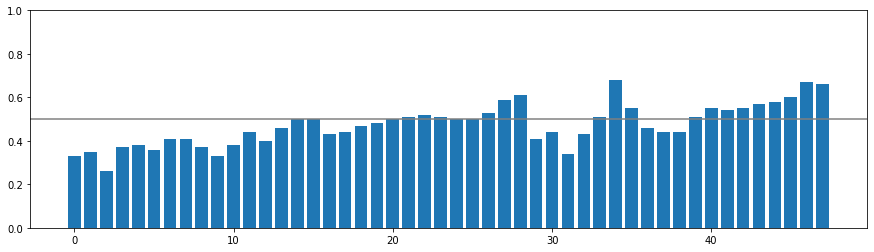

Unique Epitopes found: 408986


In [53]:
matplotlib.rcParams['figure.figsize'] = [15, 4]

plt.bar(np.arange(len(probas)),probas)
plt.axhline(0.5, color="gray")
plt.ylim(0, 1)
plt.show()

print("Unique Epitopes found:",len(global_epitopes))

In [67]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)


In [68]:
with open("epi_probas_full_phageome.json","w") as f:
    f.write(json.dumps(global_epitopes, cls=NpEncoder))

In [ ]:
#with open('epi_probas_full_phageome.json') as json_file:
#    global_epitopes = json.load(json_file)

In [66]:
global_epitopes

{'YPRRVQIMVDKPKQN': {'probability': 0.75,
  'proteins': ['REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36'],
  'start_pos': [209]},
 'LDYQYDKEVLDIAVK': {'probability': 0.61,
  'proteins': ['REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36'],
  'start_pos': [179]},
 'GMKRAAIEDYPAWTS': {'probability': 0.58,
  'proteins': ['REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36'],
  'start_pos': [125]},
 'DLKAIKKMRSIYYVY': {'probability': 0.57,
  'proteins': ['REP_uvig_48131_1_ALL_uvig_48131_1_uvig_209457_46_uvig_270087_37_uvig_276324_20_uvig_277381_102_uvig_32248_70_uvig_517213_26_uvig_536197_34_uvig_538556_36'],
  'start_pos': [153]},
 'LNVARVPDAPDEAIL': {'probability': 0.56,
  'pro

In [56]:
dolphin_tiles = {}
unused_epitopes = set()
epi_df = pd.DataFrame.from_dict(global_epitopes, orient='index')
epi_df["no_proteins"] = [len(v) for v in epi_df["proteins"]]
epi_df = epi_df.sort_values(by=["no_proteins", "probability"], ascending=False)
epis_to_be_treated = set(epi_df.index)

for epi in epi_df.index:
    if epi in epis_to_be_treated:
        #find epitopes which have the same protein set
        pset = epi_df.loc[epi,"proteins"]
        proteinset_epis=epi_df[epi_df["proteins"].apply(lambda x: x==pset)]
        epis_to_be_treated = epis_to_be_treated-set(proteinset_epis.index)
        
        #the following will drop epitopes which have lowest probability and have no partners to make tiles of 3
        no_tiles = int(len(proteinset_epis)/no_epis_per_tile) 
        tiles = ["" for _ in range(no_tiles)]
        tile_probas = [list() for _ in range(no_tiles)]
        tile_seq = ""
        epi_index = 0
        for stich in range(1,no_epis_per_tile+1):
            for tn in range(no_tiles):
                tile_probas[tn].append(proteinset_epis.iloc[epi_index,:]["probability"])
                sequence = proteinset_epis.iloc[epi_index,:].name
                epi_index += 1
                if stich == 1:
                    tiles[tn] = sequence
                else:
                    tiles[tn] = tiles[tn] + "GGGGS" + sequence                

        while len(proteinset_epis) > epi_index :
            unused_epitopes.add(proteinset_epis.iloc[epi_index,:].name)
            epi_index += 1
            
        for idx, tile in enumerate(tiles):
            dolphin_tiles[tile] = {"protein set":pset, 
                                  "tile number":(idx+1), 
                                  "tiles in protein(set)": no_tiles,
                                 "probabilities":tile_probas[idx]}
        
print("total number of dolphyn tiles = ", len(dolphin_tiles))
print("number of unused epitopes:", len(unused_epitopes))

total number of dolphyn tiles =  106762
number of unused epitopes: 88700


In [57]:
#dolphin_tiles

In [58]:
print("X, Number of tiles representing X proteins")
print(pd.Series([len(ar["protein set"]) for ar in dolphin_tiles.values()]).value_counts())
print("When a protein (set) does not have",no_epis_per_tile,"unique epitopes, it will not be respresented")

X, Number of tiles representing X proteins
1    106445
2       302
3        13
6         2
dtype: int64
When a protein (set) does not have 3 unique epitopes, it will not be respresented



# Build final library

In [59]:
prot_file = "full_phageome_tiles_proteins.faa"
dna_file_noadap = "full_phageome_tiles_oligos_noadap.fasta"
dna_file = "full_phageome_tiles_oligos.fasta"
anno_file = "full_phageome_tiles_annotation.csv"

In [60]:
anno = dict()
def junkseq(length):
    return(("***" + "".join(random.choice(AMINOACIDS) for i in range(length)))[:length])

with open(prot_file, "w") as pf:
    for seq, tile in dolphin_tiles.items():
        n = str(tile["protein set"])+"_"+str(tile["tile number"])+"of"+str(tile["tiles in protein(set)"])
        h = abs(hash(n))
        anno["dolphyn_"+str(h)] = "dolphyn_"+n
        pf.write(">"+"dolphyn_"+str(h)+"\n")
        pf.write(seq+"*\n")
        
    for seq, prots in pepsyn_all_tiles.items():
        n = str(prots)
        h = abs(hash(n))
        anno["pepsyn_"+str(h)] = "pepsyn_"+n
        pf.write(">"+"pepsyn_"+str(h)+"\n")
        pf.write(seq + junkseq(56-len(seq))+"\n")
        
    for seq, tile in global_epitopes.items():
        n = str(tile["proteins"])+"_"+str(tile["start_pos"])+"_"+str(tile["probability"])
        h = abs(hash(n))
        anno["dolphynepitopes_"+str(h)] = "dolphynepitopes_"+n
        pf.write(">"+"dolphynepitopes_"+str(h)+"\n")
        pf.write("GGGGS" + seq+ junkseq(36) + "\n")

In [61]:
revtrans_command = "pepsyn revtrans "+ prot_file + " " + dna_file_noadap
revtrans_command

'pepsyn revtrans full_phageome_tiles_proteins.faa full_phageome_tiles_oligos_noadap.fasta'

In [62]:
stream = os.popen(revtrans_command)
output = stream.read().strip()
output

''

In [63]:
with open(dna_file_noadap, "r") as na:
    with open(dna_file, "w") as wa:
        lib = ">some"
        for line in na:
            l = line.strip()
            if not line.startswith(">"):
                l = five_prime_adapter + l + three_prime_adapter
            else:
                lib = line.strip()
            wa.write(l+"\n")

In [64]:
lengths = []
c = 0
with open(dna_file, "r") as wa:
    for line in wa:
        line = line.strip()
        if not line.startswith(">"):
            c+=1
            lengths.append(len(line))
            if len(line) < 200:
                print(name, len(line))
        else:
            name = line
            
print(c)
np.unique(lengths, return_counts=True)

1000509


(array([200]), array([1000509]))

In [65]:
dolp = 0
epis = 0
peps = 0
total = 0
with open(dna_file, "r") as wa:
    for line in wa:
        total +=1
        if line.startswith(">dolphyn_"):
            dolp += 1
        elif line.startswith(">dolphynepitopes_"):
            epis += 1
        elif line.startswith(">pep"):
            peps += 1
            
print("total:", total/2 , "dolphin:", dolp, "epitopes:", epis, "pepsyn:", peps)

total: 1000509.0 dolphin: 106762 epitopes: 408986 pepsyn: 484761


# Annotations

In [69]:
# the worst way to do this!

#STOP started and annofile half done, check it out!

#with open(anno_file, "w") as pf:
 #   pf.write("tile_id\tallinfo\n")
    #for k, v in anno.items():
     #   pf.write(k+"\t"+v+"\n")
        
#annoall = pd.read_csv(anno_file, sep="\t")
annoall.index = annoall["tile_id"]
annoall["library"] = [el[0] for el in annoall['tile_id'].str.split("_")]
annoall["AA"] = ""
annoall["oligo"] = ""
identifier = ""
with open(dna_file_noadap, "r") as wa:
    for line in wa:
        if line.startswith(">"):
            identifier = line.strip()[1:]
        else:
            annoall.loc[identifier, "oligo"] = line.strip()
identifier = ""
with open(prot_file, "r") as wa:
    for line in wa:
        if line.startswith(">"):
            identifier = line.strip()[1:]
        else:
            annoall.loc[identifier, "AA"] = line.strip()
annoall.to_csv(anno_file)

KeyboardInterrupt: 

In [70]:
annoall

tile_id  \
tile_id                                                                    
dolphyn_6829932241364318794                  dolphyn_6829932241364318794   
dolphyn_1696012996643978603                  dolphyn_1696012996643978603   
dolphyn_5313617720663703804                  dolphyn_5313617720663703804   
dolphyn_7244400282710368690                  dolphyn_7244400282710368690   
dolphyn_6425870418926264155                  dolphyn_6425870418926264155   
...                                                                  ...   
dolphynepitopes_5256105000646921226  dolphynepitopes_5256105000646921226   
dolphynepitopes_1906113250365548822  dolphynepitopes_1906113250365548822   
dolphynepitopes_2674370017376580736  dolphynepitopes_2674370017376580736   
dolphynepitopes_1704980526848882317  dolphynepitopes_1704980526848882317   
dolphynepitopes_4791596804466549302  dolphynepitopes_4791596804466549302   

                                                                               allinfo  \
tile_id                                                                                  
dolphyn_6829932241364318794          dolphyn_['REP_uvig_87905_64_ALL_uvig_87905_64_...   
dolphyn_1696012996643978603          dolphyn_['REP_uvig_87905_64_ALL_uvig_87905_64_...   
dolphyn_5313617720663703804          dolphyn_['REP_uvig_311976_36_ALL_uvig_247637_4...   
dolphyn_7244400282710368690          dolphyn_['REP_uvig_64306_2_ALL_uvig_64306_2_uv...   
dolphyn_6425870418926264155          dolphyn_['REP_uvig_149224_9_ALL_uvig_149224_9'...   
...                                                                                ...   
dolphynepitopes_5256105000646921226  dolphynepitopes_['REP_uvig_47688_50_ALL_uvig_4...   
dolphynepitopes_1906113250365548822  dolphynepitopes_['REP_uvig_47688_50_ALL_uvig_4...   
dolphynepitopes_2674370017376580736  dolphynepitopes_['REP_uvig_47688_50_ALL_uvig_4...   
dolphynepitopes_1704980526848882317  dolphynepitopes_['REP_uvig_47823_41_ALL_uvig_4...   
dolphynepitopes_4791596804466549302  dolphynepitopes_['REP_uvig_47823_41_ALL_uvig_4...   

                                             library  \
tile_id                                                
dolphyn_6829932241364318794                  dolphyn   
dolphyn_1696012996643978603                  dolphyn   
dolphyn_5313617720663703804                  dolphyn   
dolphyn_7244400282710368690                  dolphyn   
dolphyn_6425870418926264155                  dolphyn   
...                                              ...   
dolphynepitopes_5256105000646921226  dolphynepitopes   
dolphynepitopes_1906113250365548822  dolphynepitopes   
dolphynepitopes_2674370017376580736  dolphynepitopes   
dolphynepitopes_1704980526848882317  dolphynepitopes   
dolphynepitopes_4791596804466549302  dolphynepitopes   

                                                                                    AA  \
tile_id                                                                                  
dolphyn_6829932241364318794          VSALKSQTAVSSIKQGGGGSKEVPAESAMPSWSLVGGGGSNHLANK...   
dolphyn_1696012996643978603          QTALNTHTGNKSNPHGGGGSTKSQVGLGNVPNVATGGGGSIAFAKI...   
dolphyn_5313617720663703804          EEVQKYRKIEKDLKEGGGGSHFIETVFEGEKHEGFGGGGSTNEDAK...   
dolphyn_7244400282710368690          TKYYDLQMDDPQDDYGGGGSDKRENIASKEKMQKIGGGGSIAKFFT...   
dolphyn_6425870418926264155          ELVKGVMTPEMLKKLGGGGSRPDAFLDKSNDFFDEGGGGSRVKSWV...   
...                                                                                ...   
dolphynepitopes_5256105000646921226                                                      
dolphynepitopes_1906113250365548822                                                      
dolphynepitopes_2674370017376580736                                                      
dolphynepitopes_1704980526848882317                                                      
dolphynepitopes_4791596804466549302                                                      

     

In [71]:
annoall.to_csv(anno_file)